In [1]:
from random import randrange
import matplotlib.pyplot as plt
import numpy as np
import cv2



In [2]:
#The image is converted from BGR channel to RGB channel and then grayscaled

In [3]:
img_og_1 = cv2.cvtColor(cv2.imread("/content/line_ransac (1).png"), cv2.COLOR_BGR2RGB)
img_gray_1 = cv2.cvtColor(img_og_1, cv2.COLOR_RGB2GRAY)
print (cv2 .__version__)

4.4.0


In [1]:
#!pip install opencv-contrib-python==4.4.0.44

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55.7 MB 47.9 MB/s 
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


In [4]:
#Step-1 ---
#We use the ORB_create in this case to detect and compute the keypoints and descriptors

In [5]:
def orb(img_gray):
  orb = cv2.ORB_create()
  temp=orb.detectAndCompute(img_gray, None)
  return temp

temp_1 = orb(img_gray_1)

In [6]:
#Step-2 ---
#The Keypoints are drawn on the given image of the scattered points
#The keypoints obtained are the black spots themselves

In [7]:
def show_keypoints(img_og,temp):
  keypoint = cv2.drawKeypoints(img_og,temp[0] , None,color=(0,255,0))
  plt.figure(figsize=(10,10))
  plt.imshow(keypoint)
  plt.title("_KEYPOINTS_")
  plt.show()


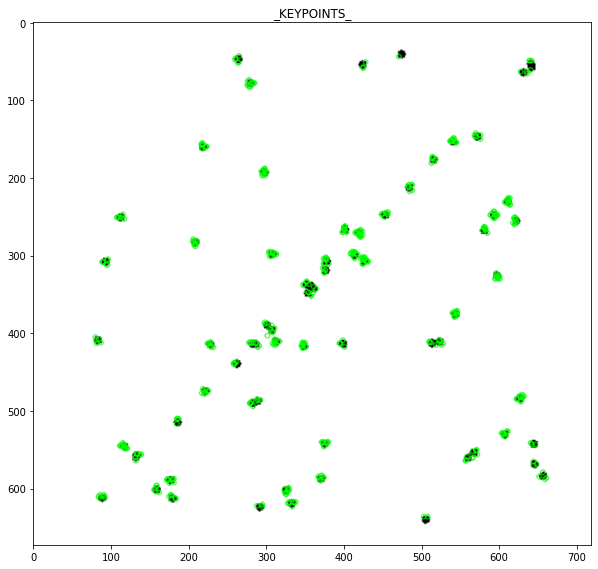

In [8]:
show_keypoints(img_og_1,temp_1)

In [9]:
#Step-3 ---
#The coordinates for the keypoints are obtained by the .pt method, and the x_coordinates and y_coordinates are appended to two lists

In [10]:
x_coord=[]
y_coord=[]
for point in temp_1[0]:
  x_coord.append(point.pt[0])
  y_coord.append(point.pt[1]) 

In [11]:
#The y-axis of the plot is inverted to obtain the original orientation

(636.0, 43.20000076293945)

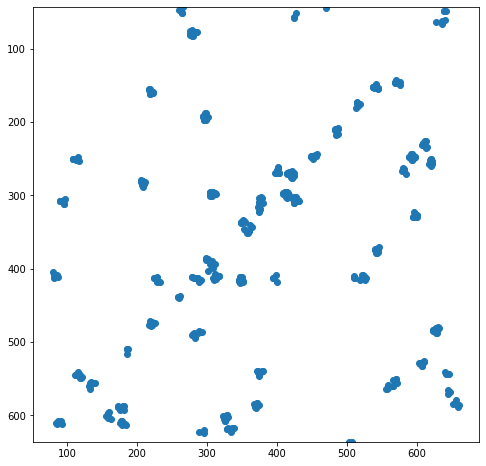

In [12]:
plt.figure(figsize=(8,8))
plt.scatter(x_coord, y_coord)
plt.ylim(max(y_coord), min(y_coord))

In [13]:
#The Lists are converted to arrays to be used in the following portion

In [14]:
x_coord_arr=np.array(x_coord)
y_coord_arr=np.array(y_coord)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from skimage.measure import LineModelND, ransac

In [16]:
#Step-4 ---
#Linear Regression is used to compare against the RANSAC model to check the accuracy of the latter

In [17]:
X_train, X_test, y_train, y_test = train_test_split(x_coord_arr.reshape(-1,1),y_coord_arr.reshape(-1,1), test_size = 0.25)

In [18]:
regr = LinearRegression()
 
regr.fit(X_train, y_train)

LinearRegression()

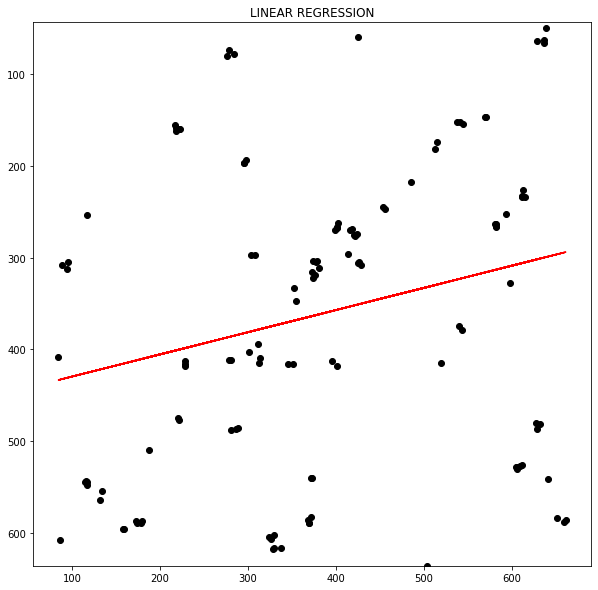

In [19]:
y_pred = regr.predict(X_test)
plt.figure(figsize=(10,10))
plt.scatter(X_test, y_test, color ='k')
plt.ylim(max(y_coord), min(y_coord))
plt.plot(X_test, y_pred, color ='r')
plt.ylim(max(y_coord), min(y_coord))
plt.title('LINEAR REGRESSION')
plt.show()

In [20]:
#In the Above, we do not obtain the best fit line possible

In [21]:
#Step-5 ---
#Using the RANSAC Model
#Creating a column stack of the x_coordinates and y_coordinates and using LineModelND() a model var is created
#LineModelND() minimises the perpendicular of all points from the estimated line
#ransac function is used from ski-image  with parameters as data array,model variable, minimum number of samples, the threshold value and N value(trials)

In [42]:
d = np.column_stack([x_coord_arr, y_coord_arr])
model = LineModelND()
model.estimate(d)
model_best, inliers = ransac(d, LineModelND, min_samples=4,residual_threshold=5, max_trials=26)
line_x = np.array([x_coord_arr.min(), x_coord_arr.max()])
line_y = model.predict_y(line_x)
line_y_best = model_best.predict_y(line_x)

Text(0.5, 1.0, 'RANSAC REGRESSION')

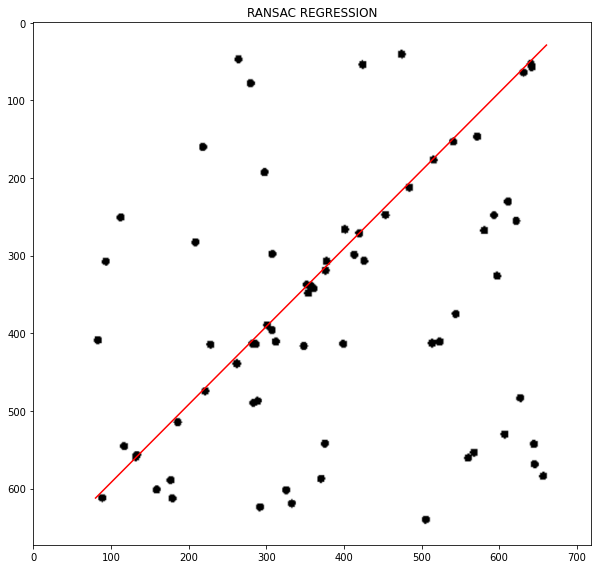

In [43]:
plt.figure(figsize=(10,10))
plt.plot(line_x, line_y_best, color='red')
plt.imshow(img_og_1)
plt.title('RANSAC REGRESSION')